In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install googletrans==4.0.0rc1
# !pip install tqdm
# !pip install wordcloud
# !pip install 'fugashi[unidic]'
# !python -m unidic download

# Load Data

In [1]:
import pandas as pd
import fugashi
from collections import defaultdict
import matplotlib.pyplot as plt
from googletrans import Translator
from tqdm import tqdm
from wordcloud import WordCloud

In [7]:
df = pd.read_excel('pochta.xlsx')

Let's look at our titles

In [8]:
# look at titles
print(*df["Title"].values, sep="\n\n")

ロシア郵便はすごい

ロシア郵便

日本郵便、ロシアポストと包括提携　シベリア鉄道輸送など

「ロシア郵便」が日本からヨーロッパへの郵便物の配達をこれまでの倍に速める


And on our texts.

In [9]:
#look at texts
print(*df['Text'].values, sep='\n\n')

旅行でロシアに来ているときも、住んでからもお世話になっているロシア郵便。

ロシア郵便での思い出もいろいろ増えている。

例えば、2011年初めてのロシア旅行時にはがきを日本へ出したが、スズダリから出したハガキは結局届かなかった。他のも1か月くらいたって、日本に届いたため、忘れた頃に届いた。

その後、旅行に来るたびに、はがきを日本へ出した。北極圏のムールマンスクからも無事に届いた。

しかし、いつだったか、モスクワのホテルから出したハガキは、これまた日本に届かなかった。

モスクワに住んでからも、近所に郵便局があるため、よく出かけた。
平日の昼間に1人で行くこともよくあった。
そこで、いろいろ思い出ができた。

例えば、絶滅危惧種であるソビエト人のおばちゃんが窓口にいるときは、強烈な思い出だ。
このおばちゃんは、たいていイライラしていることが多い。
ある日、運悪く、このおばちゃんの窓口に当たってしまった。
番号が呼ばれて、窓口に行くと、私は何も言っていないのに、私が近づいただけで、「できない」と言ったのだ。（笑）
怒りを通り越して、「お！またまたネタを提供してくれたなあ。」と思いながら、窓口に行った。
そして、「封筒をください」というと、「それなら、できる」と言って、封筒を売ってくれた。

また別の日の同じおばちゃん。
ソビエト人なので、キリル文字しか読めず、ラテン文字は読めないだろうと思い、念のためにキリル文字とラテン文字と両方書いていったら、「そのくらいは読める」と言われた。

私が、片言ロシア語で行くから、いろいろネタが転がってくるのかもしれないと思い、ある時から、夫と一緒に行くことが増えた。
夫はロシア語はできるが、郵便情報にうとい。
私は、何度か日本へ荷物を送っているから、以前は、こうだったとか、こうすればいいというのは分かっている。ただ、ロシア語ができないだけ。
夫と私で足して2で割るとちょうどいい感じで窓口に行ったことがあった。
私が片言ロシア語だから、いろいろネタが発生すると思っていたが、夫が行っても窓口のおばちゃんたちの態度はあまり変わらなかった。むしろ、私の方が場数を踏んでいたため、おばちゃんたちの言うことが分かる時もあった。

そんなある日、10㎏を超えた荷物を発送することになった。
果たして、10㎏以上を国際郵便で送れるのかどうか心配だった

# Time to process

Today we will use nagisa

Nagisa is a python module for Japanese word segmentation/POS-tagging. It is designed to be a simple and easy-to-use tool.

In [10]:
tagger = fugashi.Tagger()
for word in tagger("半ばにして亡くなった友達の死亡を悼んだ"):
    print(word.surface)

半ば
に
し
て
亡くなっ
た
友達
の
死亡
を
悼ん
だ


Now let's try it on out data.

In [17]:
DROP_POS = ["記号", "助詞", "助動詞", "補助記号"]

STOP_WORDS = [
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
    "0",
    "する",
    "し",
    "さ",
    "き",
    "よう",
    "こと",
    "テッド",
    "ある",
    "あった",
    "いる",
    "つ",
    "HP",
    "cm",
    "mm",
    "人",
    "あっ",
    "い",
    "いう",
    "その",
    "それ"
    "この",
    "これ",
    "あの",
    "あれ",
]  # add stop words

In [18]:
tagger = fugashi.Tagger()

text_counts = defaultdict(int)

for text in df["Text"]:
    for word in tagger(text):
        if word.feature.pos1 in DROP_POS or word.surface in STOP_WORDS:
            continue
        text_counts[word.surface] += 1

counts_df = (
    pd.Series(text_counts)
    .sort_values(ascending=False)
    .rename_axis("token_ja")
    .reset_index(name="count")
)

counts_df.head(50)

,token_ja,count
0,郵便,59
1,ロシア,41
2,日本,27
3,局,25
4,日,17
5,時,15
6,私,14
7,年,12
8,ため,10
9,クレーム,10


# Google Translate

Let's translate our words into russian using google translate.

In [17]:
translator = Translator()
def translate_text(text):
    result = translator.translate(text, src="ja", dest="ru")
    return result.text

ru_tokens = []

for token in tqdm(counts_df['token_ja']):
    try:
        ru_tokens.append(translate_text(token))
    except:
        ru_tokens.append('')

counts_df['token_ru'] = ru_tokens
counts_df = counts_df[['token_ja', 'token_ru', 'count']]

100%|██████████| 1084/1084 [19:16<00:00,  1.07s/it]


In [18]:
counts_df.head(50)

,token_ja,token_ru,count
0,ボール,мяч,63
1,アダプ,адаптер,48
2,視点,перспектива,46
3,できる,может,33
4,スポーツ,спорт,30
5,日本,Япония,28
6,コート,пальто,27
7,サッカー,футбольный,26
8,詳しく,подробно,25
9,学ぶ,учиться,25


# Japanese WordCloud

Time to draw a cool cloud.

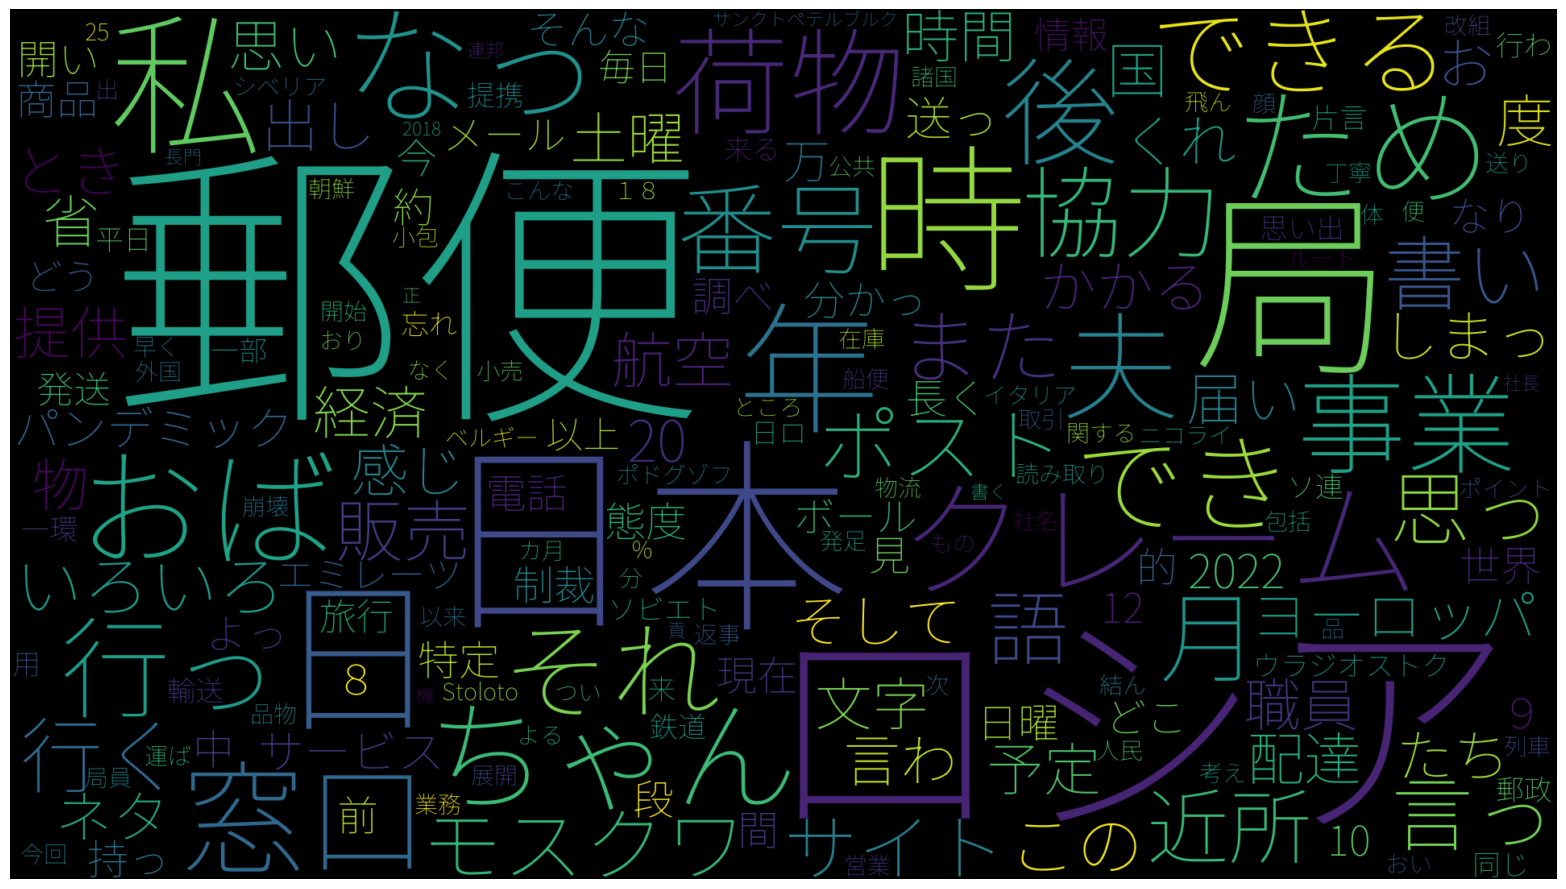

In [19]:
font_path = "font.ttf"
text_counts = {k: v for k,v in zip(counts_df['token_ja'], counts_df['count'])}

wc = WordCloud(
    font_path=font_path,
    width=1920,
    height=1080,
    background_color="black",
    collocations=True,
    prefer_horizontal=1,  
    min_font_size=8,
).generate_from_frequencies(text_counts)

plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

# Russian Wordcloud

Russian is even cooler.

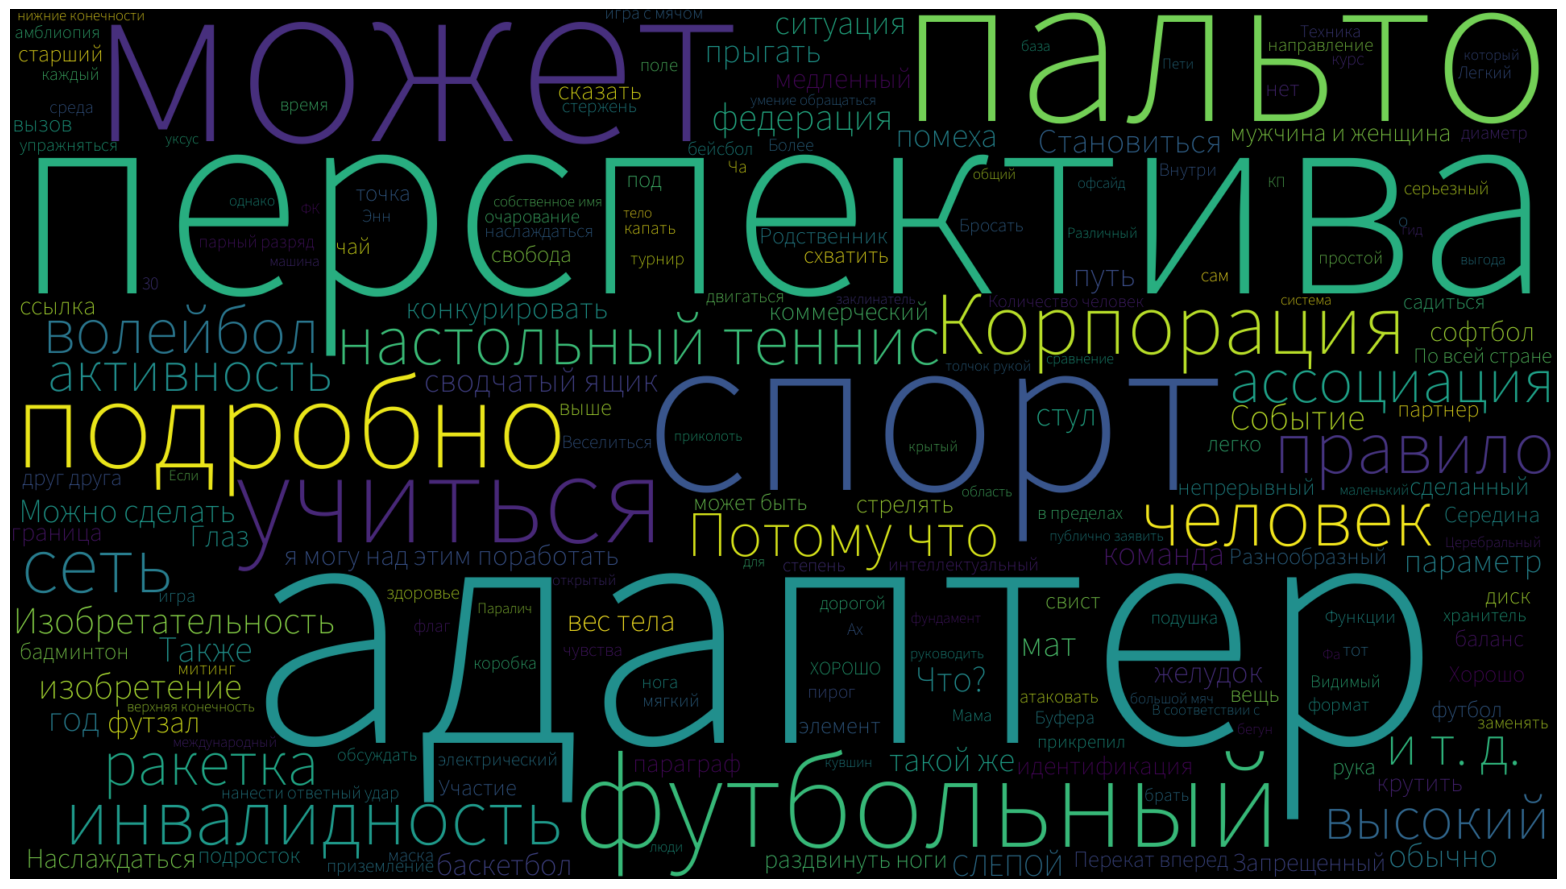

In [20]:
font_path = "font.ttf"
text_counts = {k: v for k, v in zip(counts_df["token_ru"], counts_df["count"])}

wc = WordCloud(
    font_path=font_path,
    width=1920,
    height=1080,
    background_color="black",
    collocations=True,
    prefer_horizontal=1,
    min_font_size=8,
).generate_from_frequencies(text_counts)

plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()